# Abdullah Mahmud_Project_airbNb_booking_BeforeModel
Session 3 : Data preprocessing (I)

In [1]:
import numpy as np   # import numpy
import pandas as pd  # import pandas
import os
import gc   # for gabage collection
import seaborn as sns  # data visualization lib
import matplotlib.pyplot as plt
import glob 
%matplotlib inline

In [2]:
# some customized function for plotting data
def plot_corr(df,cols):
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show()
    
def plot_count(df,col,fsize,rotation=None,fillna=True):
    fig = plt.figure(figsize=fsize)
    if fillna:
        value_count = df[col].fillna('unknown').value_counts()
    sns.barplot(value_count.index,value_count.values)
    plt.xticks(rotation=rotation)
    plt.title('value counts for {}'.format(col))
    plt.show()

In [3]:
#define your data path or specify your path, please modify your path accordingly on your own system
#DATA_PATH = '/Users/yie/Desktop/concordia/training/data/hotel_booking_prediction/new-user-bookings'
DATA_PATH = 'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\'
file_name = os.path.join(DATA_PATH,'train_users_2.csv')
print(file_name)

C:\Users\mahmu\Desktop\ConcordiaBigdata\CEBD1260_MachineLearning\code\train_users_2.csv


In [4]:
#you can also get the full path of your target file by
file_name = DATA_PATH+'train_users_2.csv'
print(file_name)

C:\Users\mahmu\Desktop\ConcordiaBigdata\CEBD1260_MachineLearning\code\train_users_2.csv


In [5]:
train_df = pd.read_csv(file_name) # this is main table for airbnb data set
print(train_df.shape)
train_df.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [6]:
file_name = os.path.join(DATA_PATH,'sessions.csv')
session_df = pd.read_csv(file_name)  # read into RAM once
print(session_df.shape)

(10567737, 6)


In [7]:
session_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


# Assignment 1: write python function to read your own data set

In terms of the sample code, please write a python function called 'load_data' to read out all of your files

e.g., 

def load_data(path):
    # your code
    
    return df

In [8]:
#This function will load data file based on the path

def load_data(path): 
    df = pd.read_csv(path)
    return df

train_path = 'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\train_users_2.csv'
train_df = load_data(train_path)

session_path = 'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\sessions.csv'
session_df = load_data(session_path)
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
session_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [10]:
# e.g., I want to check how much momery session_df takes
mem_use = session_df.memory_usage().sum() / 1024**2  # convert bytes to MB by dividing 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(mem_use))

Memory usage of dataframe is 483.75 MB


In [11]:
#DATA_PATH = '/Users/yie/Desktop/concordia/training/data/transaction_fraud'
#file_name = os.path.join(DATA_PATH,'train_transaction.csv')
DATA_PATH = 'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\'
file_name = os.path.join(DATA_PATH,'train_users_2.csv')
print(file_name)
file_name

C:\Users\mahmu\Desktop\ConcordiaBigdata\CEBD1260_MachineLearning\code\train_users_2.csv


'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\train_users_2.csv'

In [12]:
train_df = pd.read_csv(file_name)
train_df.shape

(213451, 16)

In [13]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [14]:
mem_use = train_df.memory_usage().sum() / 1024**3 # this data set takes >1.7G RAM, we should optimize it after
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

Memory usage of dataframe is 0.025445 GB


# Assignment 2: 

1. Write a function to Check all of data types in your own project data set for all columns, and print them

2. try to reduce memory usage as much as you can for all applicable cols. 

3. calculate memory usage before and after operation for your data set

In [15]:
#Function to check data types of a dataframe
def check_datatypes(df_name):
    print(df_name.dtypes)
    #return df_name.dtypes

#Data types for train_df
check_datatypes(train_df)

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object


In [16]:
#Data types for session_df
check_datatypes(session_df)

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [18]:
train_df['age'] = train_df['age'].astype(np.float16)


In [19]:
check_datatypes(train_df),check_datatypes(session_df)

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float16
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object
user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object


(None, None)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float16
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float16(1), int64(2), object(13)
memory usage: 24.8+ MB


In [21]:
mem_use = train_df.memory_usage().sum() / 1024**3
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

Memory usage of dataframe is 0.024253 GB


In [22]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [23]:
session_df['secs_elapsed'] = session_df['secs_elapsed'].astype(np.float32)

In [24]:
mem_use = session_df.memory_usage().sum() / 1024**3
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

Memory usage of dataframe is 0.433047 GB


In [25]:
# check card3, we see it is float64!!, but it is really need 64bit?
#train_df['card3'].dtype
train_df['age'].dtype

dtype('float16')

In [26]:
#let us check max and min of this 'card3' column
#train_df['card3'].max(),train_df['card3'].min()
train_df['age'].max(),train_df['age'].min()

(2014.0, 1.0)

In [27]:
# let us check the range of float 64,32 or 16 in python
np.finfo(np.float64).max,np.finfo(np.float64).min,np.finfo(np.float32).max,np.finfo(np.float32).min,np.finfo(np.float16).max,np.finfo(np.float16).min

(1.7976931348623157e+308,
 -1.7976931348623157e+308,
 3.4028235e+38,
 -3.4028235e+38,
 65500.0,
 -65500.0)

In [28]:
#convert card3 into float16, by doing this, we reduce some space usaged for col 'card3'
#train_df['card3'] = train_df['card3'].astype(np.float16)
train_df['age'] = train_df['age'].astype(np.float16)

In [29]:
train_df['age'].dtype # now it is forced to be float16

dtype('float16')

In [30]:
# now let us check the memory usage now, you will notice the momery decreases. You can imagine if there are millions of 
# data sample with many columns, this operation will reduce much RAM
mem_use = train_df.memory_usage().sum() / 1024**3
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

Memory usage of dataframe is 0.024253 GB


In [31]:
#DATA_PATH = '/Users/yie/Desktop/concordia/training/data/home_credit_risk/home-credit-default-risk/'
#file_name = os.path.join(DATA_PATH,'application_train.csv')
DATA_PATH = 'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\'
file_name = os.path.join(DATA_PATH,'train_users_2.csv')
file_name

'C:\\Users\\mahmu\\Desktop\\ConcordiaBigdata\\CEBD1260_MachineLearning\\code\\train_users_2.csv'

In [32]:
train_df = pd.read_csv(file_name)
train_df.shape

(213451, 16)

In [33]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [34]:
# get info of missing data for each col by creading data frame that contains col's name and its NaN value counts
nan_info = pd.DataFrame(train_df.isnull().sum()).reset_index()
nan_info.columns = ['col','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info

,col,nan_cnt
3,date_first_booking,124543
5,age,87990
11,first_affiliate_tracked,6065
0,id,0
1,date_account_created,0
2,timestamp_first_active,0
4,gender,0
6,signup_method,0
7,signup_flow,0
8,language,0


In [35]:
# get all cols with missing data
cols_with_missing = nan_info.loc[nan_info.nan_cnt>0].col.values
cols_with_missing

array(['date_first_booking', 'age', 'first_affiliate_tracked'],
      dtype=object)

In [36]:
# get null/NaN/missing cols
nas = train_df.isna()
nacnt = {}
for f in train_df.columns:
    n = nas[f].sum()
    nacnt[n]=[]
for f in train_df.columns:
    n=nas[f].sum()
    nacnt[n].append(f)

In [37]:
nacnt

{0: ['id',
  'date_account_created',
  'timestamp_first_active',
  'gender',
  'signup_method',
  'signup_flow',
  'language',
  'affiliate_channel',
  'affiliate_provider',
  'signup_app',
  'first_device_type',
  'first_browser',
  'country_destination'],
 124543: ['date_first_booking'],
 87990: ['age'],
 6065: ['first_affiliate_tracked']}

In [38]:
# let us check basic data types in each col with missing values
for f in cols_with_missing:
    print(f, train_df[f].dtype)

date_first_booking object
age float64
first_affiliate_tracked object


In [39]:
# train_df['OCCUPATION_TYPE'] = train_df['OCCUPATION_TYPE'].fillna('unknown')
#train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].min(),train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].max(),train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()/len(train_df)
train_df['age'].min(),train_df['age'].max(),train_df['age'].isna().sum()/len(train_df)

(1.0, 2014.0, 0.41222575673105305)

In [40]:
#train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(),inplace=True)
# or
#train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)
# what do you decide?
train_df['age'].fillna(train_df['age'].mean(),inplace=True)
# or
#train_df['age'].fillna(train_df['age'].median(),inplace=True)

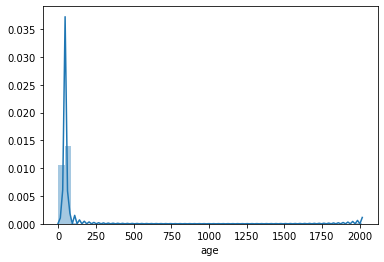

In [41]:
#sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].median()))
sns.distplot(train_df['age'].fillna(train_df['age'].median()))

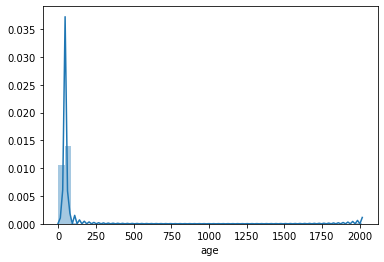

In [42]:
#sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()))
sns.distplot(train_df['age'].fillna(train_df['age'].mean()))

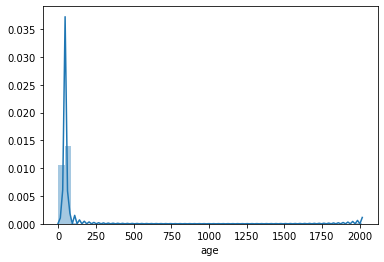

In [43]:
#train_df['COMMONAREA_MEDI'].mean(),train_df['COMMONAREA_MEDI'].median(),train_df['COMMONAREA_MEDI'].std()
sns.distplot(train_df['age'].fillna(train_df['age'].std()))

In [44]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Assignment 3: 

1. Check your own project to find all cols with missing values
2. Analyze them and make decision how to fill missing values
3. Fill missing values

In [45]:
train_df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [46]:
session_df.isna().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [47]:
train_df['age'].median()

49.66833517985669

In [48]:
train_df['age'] = train_df['age'].fillna(train_df['age'].median())
train_df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [49]:
# Replace all age > 90 with median
Replace_age = train_df.age > 90
train_df.loc[Replace_age, 'age'] = train_df['age'].median()
print (train_df.age > 90)

0         False
1         False
2         False
3         False
4         False
          ...  
213446    False
213447    False
213448    False
213449    False
213450    False
Name: age, Length: 213451, dtype: bool


In [50]:
# Replace all age < 18 with median
Replace_age = train_df.age <18
train_df.loc[Replace_age, 'age'] = train_df['age'].median()
print (train_df.age <18)

0         False
1         False
2         False
3         False
4         False
          ...  
213446    False
213447    False
213448    False
213449    False
213450    False
Name: age, Length: 213451, dtype: bool


# Assignment 4: 

You can work on your own project data and define some conditions and find subset that satisfy these conditions

You should submit at least 5 cases you define :)

In [51]:
#train_df['NAME_CONTRACT_TYPE'].unique()
train_df['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [52]:
#find data where NAME_CONTRACT_TYPE=='Cash loans'
#temp_df = train_df.loc[train_df['NAME_CONTRACT_TYPE']=='Cash loans']
temp_df = train_df.loc[train_df['gender']=='FEMALE']
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [53]:
train_df['affiliate_channel'].unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

In [54]:
temp_df = train_df.loc[train_df['affiliate_channel']=='direct']
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.000000,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [55]:
train_df['language'].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [56]:
temp_df = train_df.loc[train_df['language']=='en']
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [57]:
################ Modify from assignment 4
#1. Handle "timestamp_first_active", it is real time stamp, but you need to split them by writting a simple script
# Change Dates to consistent format
print("Fixing timestamps...")
train_df['date_account_created'] = pd.to_datetime(train_df['date_account_created'], format='%Y-%m-%d')
train_df['timestamp_first_active'] = pd.to_datetime(train_df['timestamp_first_active'], format='%Y%m%d%H%M%S')
#main_df['date_account_created'].fillna(main_df.timestamp_first_active, inplace=True)
train_df.head()

Fixing timestamps...


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [58]:
################Modify from assignment 4, Split date
# 2. from time stamp you just created from 1, extract more information on year, month, week, weekday,......
train_df['First_Active_year'],train_df['First_Active_month']= train_df.timestamp_first_active.dt.year,train_df.timestamp_first_active.dt.month
train_df['First_Active_day'],train_df['First_Active_Week'] = train_df.timestamp_first_active.dt.day,train_df.timestamp_first_active.dt.week
train_df['First_Active_Hour'],train_df['First_Active_Min']= train_df.timestamp_first_active.dt.hour,train_df.timestamp_first_active.dt.minute
train_df['First_Active_Sec'],train_df['First_Active_DayOfWeek'] = train_df.timestamp_first_active.dt.second,train_df.timestamp_first_active.dt.weekday
train_df['First_Active_Sec'],train_df['First_Active_DayName'] = train_df.timestamp_first_active.dt.second,train_df.timestamp_first_active.dt.weekday_name
train_df['First_Active_Sec'],train_df['First_Active_DayYear'] = train_df.timestamp_first_active.dt.second,train_df.timestamp_first_active.dt.year
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,First_Active_year,First_Active_month,First_Active_day,First_Active_Week,First_Active_Hour,First_Active_Min,First_Active_Sec,First_Active_DayOfWeek,First_Active_DayName,First_Active_DayYear
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,49.668335,facebook,0,en,direct,...,2009,3,19,12,4,32,55,3,Thursday,2009
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.000000,facebook,0,en,seo,...,2009,5,23,21,17,48,9,5,Saturday,2009
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.000000,basic,3,en,direct,...,2009,6,9,24,23,12,47,1,Tuesday,2009
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,...,2009,10,31,44,6,1,29,5,Saturday,2009
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.000000,basic,0,en,direct,...,2009,12,8,50,6,11,5,1,Tuesday,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaN,MALE,32.000000,basic,0,en,sem-brand,...,2014,6,30,27,23,56,36,0,Monday,2014
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaN,-unknown-,49.668335,basic,0,en,direct,...,2014,6,30,27,23,57,19,0,Monday,2014
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaN,-unknown-,32.000000,basic,0,en,direct,...,2014,6,30,27,23,57,54,0,Monday,2014
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaN,-unknown-,49.668335,basic,25,en,other,...,2014,6,30,27,23,58,22,0,Monday,2014


In [59]:
session_df['device_type'].unique()

array(['Windows Desktop', '-unknown-', 'Mac Desktop', 'Android Phone',
       'iPhone', 'iPad Tablet', 'Android App Unknown Phone/Tablet',
       'Linux Desktop', 'Tablet', 'Chromebook', 'Blackberry', 'iPodtouch',
       'Windows Phone', 'Opera Phone'], dtype=object)

In [60]:
temp_df = session_df.loc[session_df['device_type']=='Mac Desktop']
temp_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
127,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0
128,yo8nz8bqcq,create,submit,create_user,Mac Desktop,NaN
129,yo8nz8bqcq,confirm_email,click,confirm_email_link,Mac Desktop,115983.0
130,yo8nz8bqcq,show,view,p3,Mac Desktop,20285.0
131,yo8nz8bqcq,show_personalize,data,user_profile_content_update,Mac Desktop,3255.0


In [61]:
session_df['action_type'].unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [62]:
temp_df = session_df.loc[session_df['action_type']=='booking_request']
temp_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
139,4grx6yxeby,pending,booking_request,pending,Windows Desktop,1000.0
2340,s9xrwtyzsq,pending,booking_request,pending,iPad Tablet,0.0
2497,j0mufvhhoh,pending,booking_request,pending,iPhone,260000.0
3053,toga865pvz,at_checkpoint,booking_request,at_checkpoint,iPhone,1830.0
4078,nmptg2k3tj,pending,booking_request,pending,Windows Desktop,112229.0


In [63]:
## Modify form assignment 4 change secs_elapsed to float32
session_df['secs_elapsed'] = session_df['secs_elapsed'].astype(np.float32)
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float32
dtypes: float32(1), object(5)
memory usage: 443.4+ MB


In [64]:
session_df = session_df.rename(columns={"user_id": "id"})
session_df.head()

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [65]:
#Creating some new feature colums
action_count = session_df.groupby(['id', 'action'])['secs_elapsed'].agg(len).unstack()
action_type_count = session_df.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = session_df.groupby(['id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = session_df.groupby(['id', 'device_type'])['secs_elapsed'].agg(sum).unstack()
sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')
sessions_data.reset_index(inplace=True)
sessions_data.rename(columns = {'index': 'id'}, inplace=True)
sessions_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,id,10_count,11_count,12_count,15_count,about_us_count,accept_decline_count,account_count,acculynk_bin_check_failed_count,acculynk_bin_check_success_count,...,Chromebook_count,Linux Desktop_count,Mac Desktop_count,Opera Phone_count,Tablet_count,Windows Desktop_count,Windows Phone_count,iPad Tablet_count,iPhone_count,iPodtouch_count
0,00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,295642.0,NaN,NaN,NaN,NaN,NaN,572254.0,NaN
1,0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,586543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002qnbzfs5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283569.0,NaN


In [66]:
secs_elapsed = session_df.groupby('id')['secs_elapsed']
secs_elapsed = secs_elapsed.agg(
    {
        'secs_elapsed_sum': np.sum,
        'secs_elapsed_mean': np.mean,
        'secs_elapsed_min': np.min,
        'secs_elapsed_max': np.max,
        'secs_elapsed_median': np.median,
        'secs_elapsed_std': np.std,
        'secs_elapsed_var': np.var,
        'day_pauses': lambda x: (x > 86400).sum(),
        'long_pauses': lambda x: (x > 300000).sum(),
        'short_pauses': lambda x: (x < 3600).sum(),
        'session_length' : np.count_nonzero
    }
)
secs_elapsed.reset_index(inplace=True)
secs_elapsed.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,id,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_min,secs_elapsed_max,secs_elapsed_median,secs_elapsed_std,secs_elapsed_var,day_pauses,long_pauses,short_pauses,session_length
0,00023iyk9l,867896.0,22253.744141,0.0,567165.0,850.0,92242.562500,8.508690e+09,2.0,1.0,29.0,39.0
1,0010k6l0om,586543.0,9460.371094,3.0,127898.0,948.5,22751.228516,5.176184e+08,2.0,0.0,46.0,63.0
2,001wyh0pz8,282965.0,3179.382080,35.0,50548.0,1105.0,6569.647949,4.316028e+07,0.0,0.0,71.0,90.0
3,0028jgx1x1,297010.0,9900.333008,3.0,84636.0,1614.0,18004.964844,3.241788e+08,0.0,0.0,17.0,31.0
4,002qnbzfs5,6487080.0,8232.334961,0.0,1418284.0,498.0,58110.644531,3.376847e+09,13.0,3.0,602.0,787.0


# Joining

In [67]:
#train_df = train_df.merge(sessions_data,on='id',how='left')

sessions_secs_elapsed = pd.merge(sessions_data, secs_elapsed, on='id', how='left')
train_df = pd.merge(train_df, sessions_secs_elapsed, on='id', how = 'left')
train_df.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,secs_elapsed_mean,secs_elapsed_min,secs_elapsed_max,secs_elapsed_median,secs_elapsed_std,secs_elapsed_var,day_pauses,long_pauses,short_pauses,session_length
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaN,MALE,32.000000,basic,0,en,sem-brand,...,47168.769531,34.0,1445590.0,1729.0,166943.953125,2.787028e+10,11.0,6.0,65.0,110.0
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaN,-unknown-,49.668335,basic,0,en,direct,...,12147.358398,0.0,748658.0,570.0,60152.378906,3.618309e+09,4.0,3.0,164.0,237.0
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaN,-unknown-,32.000000,basic,0,en,direct,...,20175.412109,39.0,149128.0,1392.0,43628.093750,1.903411e+09,2.0,0.0,12.0,18.0
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaN,-unknown-,49.668335,basic,25,en,other,...,4616.337891,8.0,66636.0,2410.0,8970.789062,8.047505e+07,0.0,0.0,47.0,75.0
213450,nw9fwlyb5f,2014-06-30,2014-06-30 23:58:24,NaN,-unknown-,49.668335,basic,25,en,direct,...,68980.250000,8.0,1679278.0,419.0,276697.937500,7.656174e+10,4.0,2.0,26.0,41.0


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Columns: 575 entries, id to session_length
dtypes: datetime64[ns](2), float32(549), float64(1), int64(10), object(13)
memory usage: 491.0+ MB
